# Importing libraries

In [1]:
from fastai.basics import *
%matplotlib inline

In [2]:
from matplotlib import animation, rc
rc('animation', html="jshtml")

# Creating dataset

In [3]:
n = 100

In [4]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[-0.6947,  1.0000],
        [-0.2676,  1.0000],
        [-0.1879,  1.0000],
        [ 0.0730,  1.0000],
        [ 0.1791,  1.0000]])

In [5]:
a = tensor(3., 2)
a

tensor([3., 2.])

In [6]:
y = x@a + torch.rand(100)
y[:5]

tensor([0.4314, 1.3432, 1.8028, 2.4519, 3.4785])

In [7]:
a_pred = torch.rand(2)
a_pred.uniform_(-1., 1)

tensor([-0.1323,  0.3826])

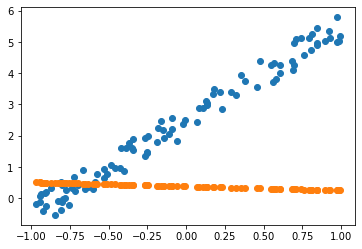

In [8]:
y_hat = x@a_pred
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)
plt.show()

# Gradient Descent with MSE Loss

In [9]:
def mse(y_hat, y):
    return torch.mean(torch.square(y_hat - y))

In [10]:
a_pred = nn.Parameter(a_pred)
a_pred

Parameter containing:
tensor([-0.1323,  0.3826], requires_grad=True)

In [11]:
def update():
    y_hat = x@a_pred
    loss = mse(y_hat, y)
    loss.backward()
    if t % 10 == 0: print(loss)
    with torch.no_grad():
        a_pred.sub_(lr * a_pred.grad)
        a_pred.grad.zero_()

In [12]:
lr = 1e-1
for t in range(100): update()

tensor(7.3441, grad_fn=<MeanBackward0>)
tensor(0.9797, grad_fn=<MeanBackward0>)
tensor(0.2633, grad_fn=<MeanBackward0>)
tensor(0.1203, grad_fn=<MeanBackward0>)
tensor(0.0905, grad_fn=<MeanBackward0>)
tensor(0.0843, grad_fn=<MeanBackward0>)
tensor(0.0830, grad_fn=<MeanBackward0>)
tensor(0.0827, grad_fn=<MeanBackward0>)
tensor(0.0826, grad_fn=<MeanBackward0>)
tensor(0.0826, grad_fn=<MeanBackward0>)


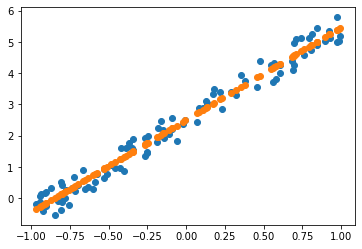

In [13]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a_pred.detach().numpy())
plt.show()

# Animating gradient descent

In [14]:
a_pred = nn.Parameter(torch.rand(2))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a_pred.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a_pred.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)